In [2]:
import pandas as pd
df=pd.read_csv('/content/snda_final_simulation.csv')
df.head()

,Name,Handle,Media URL,Retweets,Likes,Comments,Views,Tweet URL,Profile Link,Post Body,Date,Timestamp,cleaned_post_body,sentiment,followers_count,retweeted_by,mutual_friends
0,Robin Monotti,@robinmonotti,https://pbs.twimg.com/media/F5iLwwcXIAAe64C?fo...,10000,21000,501,2500000,https://x.com/robinmonotti/status/170026253692...,https://x.com/robinmonotti,PHYSICS NOBEL PRIZE 2022\nSIGNS CLIMATE DECLAR...,09-08-2023,2023-09-08T21:39:12.000Z,physic nobel prize sign climate declaration cl...,POSITIVE,102824,@1_Akriti_,Tangwa Abilu..SDG's.
1,Robin Monotti,@robinmonotti,https://pbs.twimg.com/media/F85HJgLW8AAy66l?fo...,1900,3000,60,153000,https://x.com/robinmonotti/status/171538674293...,https://x.com/robinmonotti,PHYSICS NOBEL PRIZE 2022\nSIGNED CLIMATE DECLA...,20-10-2023,2023-10-20T15:17:24.000Z,physic nobel prize signed climate declaration ...,POSITIVE,20409,@CrafteeThe,Nature Positive
2,UN Environment Programme,@UNEP,https://pbs.twimg.com/amplify_video_thumb/1158...,1200,1800,37,150000,https://x.com/UNEP/status/1160415586129780736,https://x.com/UNEP,Climate change has ripple effects. Some of the...,08-11-2019,2019-08-11T05:00:09.000Z,climate change ripple effect devastating chain...,NEGATIVE,17506,@PaulEDawson,Nature Positive
3,UN Climate Change,@UNFCCC,https://pbs.twimg.com/media/D6nwn3cXoAAX1U4.jp...,243,227,9,100,https://x.com/UNFCCC/status/1130080661753147392,https://x.com/UNFCCC,Accelerating #ClimateChange impacts mean that ...,19-05-2019,2019-05-19T12:00:00.000Z,accelerating climatechange impact mean farmer ...,NEGATIVE,7442,@NatureDeal,Jennifer Gunter
4,Alex Epstein,@AlexEpstein,https://pbs.twimg.com/media/GIKmEwZbgAAQ207?fo...,119,390,11,29000,https://x.com/AlexEpstein/status/1766156613839...,https://x.com/AlexEpstein,It's an irrefutable but little-known fact that...,03-08-2024,2024-03-08T17:38:44.000Z,irrefutable littleknown fact world warmed c hu...,NEGATIVE,5847,@UNFCCC,"Susan Joy Hassol, Climate Communication"


Community 1: ['TheCrafteeKitty', 'Pathfinders', 'Houman David Hemmati, MD, PhD', 'The Aureus Press', 'Jason Hickel', 'CNN', 'Fred Iutzi', 'ODPM Trinidad and Tobago', 'IISD Energy', 'Steve Milloy', 'UNCS News', 'Loss and Damage Collaboration (L&DC)', 'yussif', 'UN Environment Programme', 'UNDRR', 'Congressman Raja Krishnamoorthi', 'Gummi', 'Jesse Singal', 'MrSolo4Dolo', 'GO GREEN', 'Michael Shellenberger', 'James E. Clyburn', 'thatadult', 'Teach Cartel', 'Intriguing and unexpected content!', 'WWF', 'Rosmel RodrÃ\xadguez', 'Vanessa Nakate', "Tangwa Abilu..SDG's.", 'UN Development', 'UN Biodiversity', 'Natsu', 'Susan Joy Hassol, Climate Communication', 'Quentin Dempster', 'keewa', 'Dr. Samantha Montano', 'Noah Smith', 'Zali Steggall MP', 'Editorial office D+C', 'Paras Chopra', 'Rt Hon Lord Alok Sharma', 'ipbes', 'United Nations', 'ATC Spaces', 'Akritii', 'we the people (#wtpBLUE)', 'Emil Dimanchev', 'Tim Canova', 'Current World Environment', 'Robin Monotti', 'Geospatial World', 'NatureEco

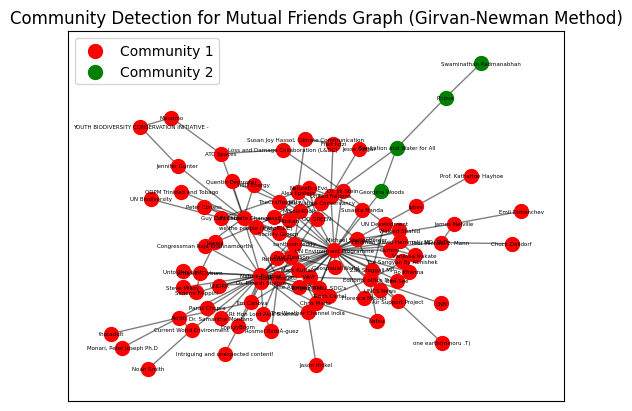

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for index, row in df.iterrows():
    if row['mutual_friends'] != 'none':
        G.add_edge(row['Name'], row['mutual_friends'])

def girvan_newman(graph):
    G_copy = graph.copy()
    while G_copy.number_of_edges() > 0:
        edge_to_remove = nx.edge_betweenness_centrality(G_copy)
        max_edge = max(edge_to_remove, key=edge_to_remove.get)
        G_copy.remove_edge(*max_edge)

        components = list(nx.connected_components(G_copy))
        if len(components) > 1:
            return components

communities = girvan_newman(G)

for i, community in enumerate(communities):
    print(f"Community {i+1}: {list(community)}")

pos = nx.spring_layout(G)
colors = ['r', 'g', 'b', 'y', 'c', 'm']

for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], node_size=100, label=f'Community {i+1}')

nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=4)

plt.title("Community Detection for Mutual Friends Graph (Girvan-Newman Method)")
plt.legend()
plt.show()


In [5]:
!pip install python-louvain


In [8]:
import networkx as nx
import community as community_louvain

partition = community_louvain.best_partition(G)
print(f'partition:{partition}')

modularity_value = community_louvain.modularity(partition, G)

print(f"Modularity: {modularity_value}")

partition:{'Robin Monotti': 0, "Tangwa Abilu..SDG's.": 0, 'Nature Positive': 1, 'UN Environment Programme': 4, 'UN Climate Change': 3, 'Jennifer Gunter': 3, 'Alex Epstein': 5, 'Susan Joy Hassol, Climate Communication': 5, 'Michael Shellenberger': 4, 'Zali Steggall MP': 4, 'Houman David Hemmati, MD, PhD': 4, 'Vanessa Nakate': 4, 'ATC Spaces': 3, 'Loss and Damage Collaboration (L&DC)': 3, 'Dr. Jill Stein': 3, 'United Nations': 5, 'Georgina Woods': 5, 'Sanitation and Water for All': 5, 'Editorial office D+C': 1, 'YOUTH BIODIVERSITY CONSERVATION INITIATIVE -': 3, 'Massimo': 3, 'Chris Martz': 1, 'Paul Dawson': 0, 'Peter Corless': 3, 'ODPM Trinidad and Tobago': 3, 'Muskan': 3, 'Fred Iutzi': 5, 'Current World Environment': 2, 'Akritii': 2, 'Jason Hickel': 1, 'The Weather Channel India': 1, 'Air Support Project': 4, 'Picpus': 5, 'Guy Carpenter': 5, 'Ro Khanna': 4, 'Congressman Raja Krishnamoorthi': 3, 'James E. Clyburn': 1, 'Simone Filippini': 1, 'CNN': 1, 'Steve Milloy': 1, 'Natsu': 1, 'GO GR

<ipython-input-13-e8a89a8a0856>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


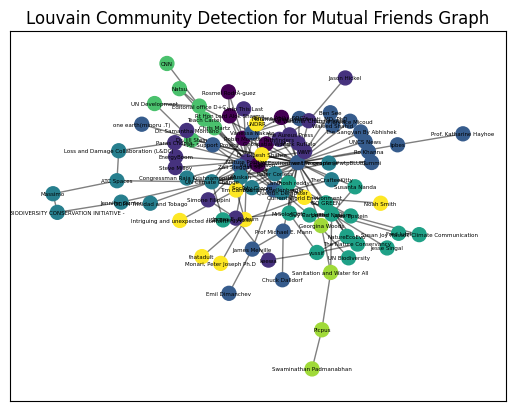

In [13]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm

partition = community_louvain.best_partition(G)

pos = nx.spring_layout(G)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

nx.draw_networkx_nodes(G, pos, node_size=100, cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(G, pos, alpha=0.5)

nx.draw_networkx_labels(G, pos, font_size=4, font_color='black')

plt.title("Louvain Community Detection for Mutual Friends Graph")
plt.show()